In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pykrx import stock

import time
from functools import wraps
from xml.etree import ElementTree

import pandas as pd
import numpy as np
from datetime import datetime, date
from pykrx import stock



In [2]:
# def my_ticker(*names):    
#     df_code = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0]
#     df_code['종목코드'] = df_code['종목코드'].map('{:06d}'.format)
#     df_code = df_code[['회사명', '종목코드']]
#     code_list = []
#     for name in names:
#         code = df_code.query("회사명=='{}'".format(name))['종목코드'].to_string(index=False)
#         code_list.append(code)
#     return code_list
# #     return code.strip()
# my_ticker('삼성전자','현대자동차')

In [3]:
def my_ticker(names):    
    df_code = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0]
    df_code.종목코드 = df_code.종목코드.map('{:06d}'.format)

    df_code = df_code[['회사명', '종목코드']]
    code_list = []
    for name in names:
        code = df_code.query("회사명=='{}'".format(name))['종목코드'].to_string(index=False)
        code_list.append(code)
    return code_list

# stocks = my_ticker(['삼성전자', 'SK하이닉스', '현대자동차', 'NAVER'])
# print(stocks)

In [4]:
# def mylogger(func):
#     @wraps(func)
#     def wrapper(*args, **kwargs):
#         start = time.perf_counter()
#         success, failed = func(*args, **kwargs)
#         end = time.perf_counter() - start
#         func_start, func_end = args[0], args[1]
#         print(#f'#date: {func_start} ~ {func_end}, \n',
#               f'#success: {success} item(s), \n',
#               f'#failed: {failed} item(s), \n',
#              )
#     return wrapper
# @mylogger
def my_krx(start, end, *codes):
    error_list = []
    failed = 0
    success = 0
    for code in codes:
        try:
            df = stock.get_market_ohlcv_by_date(start, end, code)
            df.reset_index(inplace=True)
            df.insert(loc=1, column='종목코드', value=code)
            df.columns = ['date', 'code', 'open', 'high', 'low', 'close','volume']
            success += 1
        except ElementTree.ParseError as e:
            error_list.append(e)
            drop_rows(database, table, code)  # 특정 종목코드에서 에러 발생 시 해당 종목코드에 대한 데이터 삭제 후 다음 종목코드로 넘어감
            failed += 1
            continue
        except Exception as e:
            print('Error occurred : ', e)
            failed += 1
            continue
    print(f'success:{success}, failed:{failed}')
    return df

In [5]:
stocks = ['삼성전자', 'SK하이닉스', '현대자동차', 'NAVER']
stock_code = my_ticker(stocks)
print(stock_code)

df = pd.DataFrame()
for i, code in enumerate(stock_code):
    col = stocks[i]
    df[col]= my_krx('20160104', '20180427', code)['종가']
df.head()

['005930', '000660', '005380', '035420']
Error occurred :  Length mismatch: Expected axis has 9 elements, new values have 7 elements
success:0, failed:1
Error occurred :  Length mismatch: Expected axis has 9 elements, new values have 7 elements
success:0, failed:1
Error occurred :  Length mismatch: Expected axis has 9 elements, new values have 7 elements
success:0, failed:1
Error occurred :  Length mismatch: Expected axis has 9 elements, new values have 7 elements
success:0, failed:1


,삼성전자,SK하이닉스,현대자동차,NAVER
0,1205000,30150,144000,632000
1,1208000,30600,143500,637000
2,1175000,30750,140000,623000
3,1163000,30200,137500,652000
4,1171000,29700,136500,652000


# Data Load

In [6]:
df = pd.read_csv("./datasets/kospi_top10.csv")  
df = df.set_index("날짜")
df = df.iloc[:, [0,1,9]]
df

,삼성전자,LG에너지솔루션,기아
날짜,,,
2023-04-03,63100,586000,81200
2023-04-04,63600,575000,80100
2023-04-05,63900,588000,81300
2023-04-06,62300,580000,81000
2023-04-07,65000,580000,80100
2023-04-10,65700,596000,81000
2023-04-11,65900,610000,85000
2023-04-12,66000,590000,86100
2023-04-13,66100,599000,86600


In [7]:
daily_ret  = df.pct_change() 
annual_ret = daily_ret.mean() * 252
daily_cov  = daily_ret.cov() 
annual_cov = daily_cov * 252

port_ret = [] 
port_risk = [] 
port_weights = [] 

stocks = df.columns

for _ in range(20000): 
    weights = np.random.random(len(stocks)) 
    weights = weights / np.sum(weights) 

    returns = np.dot(weights, annual_ret) 
    risk    = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights))) 

    port_ret.append(returns) 
    port_risk.append(risk) 
    port_weights.append(weights) 

port_dic = {'Returns': port_ret, 'Risk': port_risk, 'Weight': port_weights} 
for i, stock_name in enumerate(stocks): 
    port_dic[stock_name] = [     weight[i] for weight in port_weights    ] 
df = pd.DataFrame(port_dic) 
# df = df[['Returns', 'Risk'] + [s for s in stocks]] 
df

,Returns,Risk,Weight,삼성전자,LG에너지솔루션,기아
0,-0.075852,0.206455,"[0.14633122090057696, 0.5045510794293575, 0.34...",0.146331,0.504551,0.349118
1,0.317891,0.240366,"[0.008878457492211018, 0.3696676083706204, 0.6...",0.008878,0.369668,0.621454
2,-0.330712,0.227904,"[0.0604419025682345, 0.6716671299315322, 0.267...",0.060442,0.671667,0.267891
3,-0.040192,0.189165,"[0.54431087401163, 0.30500745944167695, 0.1506...",0.544311,0.305007,0.150682
4,0.429511,0.186438,"[0.3470138140545939, 0.15931374509857382, 0.49...",0.347014,0.159314,0.493672
...,...,...,...,...,...,...
19995,0.611348,0.249297,"[0.06710344388232563, 0.1958066835028794, 0.73...",0.067103,0.195807,0.737090
19996,-0.294964,0.221958,"[0.0911807814048773, 0.6396953317793448, 0.269...",0.091181,0.639695,0.269124
19997,0.341076,0.177842,"[0.4092955865235224, 0.1752729089637574, 0.415...",0.409296,0.175273,0.415432
19998,-0.165507,0.195135,"[0.47543119018909985, 0.3993412700167644, 0.12...",0.475431,0.399341,0.125228


# 효율적 투자선(Efficient Frontier)
* x: risk y:reutrn로 하는 포트폴리오 자산 배분 전략
* 여러 투자 포트폴리오 중에서 동일한 위험을 가진 것들 중 가장 기대 수익률이 높은 포트폴리오를 나타내거나, 동일한 기대 수익률을 가진 것들 중에서 가장 위험이 낮은 포트폴리오를 나타내는 그래프

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
C:\AI\pythonProject\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49340 (\N{HANGUL SYLLABLE SAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\AI\pythonProject\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\AI\pythonProject\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\AI\pythonProject\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: 

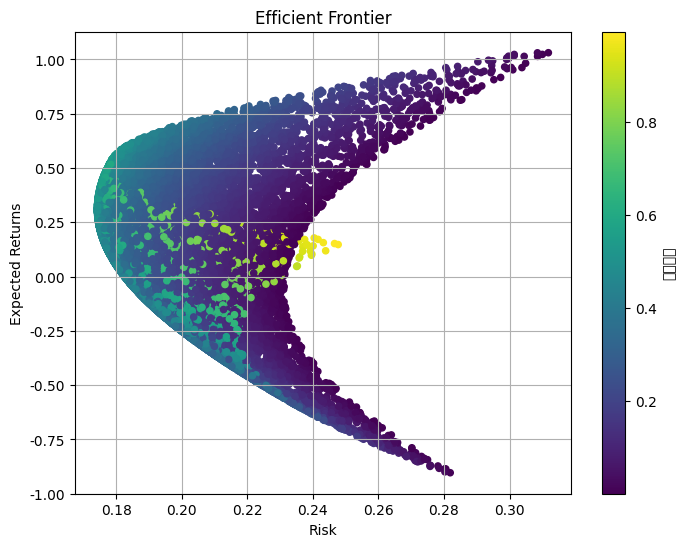

In [11]:
df.plot.scatter(x='Risk', y='Returns',c='삼성전자', figsize=(8, 6), grid=True)
plt.title('Efficient Frontier') 
plt.xlabel('Risk') 
plt.ylabel('Expected Returns') 
plt.show() 